![pydatalogo](https://user-images.githubusercontent.com/7065401/46249227-f76b1d80-c3fb-11e8-931e-8a9adc12bd4e.png)

<div style="color: #444; text-align: center;">
    <b>Córdoba 2018</b>
    <br>
    <span>Matías Caputti</span>
</div>

---

# Get image colors using _k-means_ clustering

In [1]:
from sklearn.cluster import KMeans
from collections import Counter
from matplotlib import pyplot as plt
import cv2

Clustering with the K-means algorithm is one of the most common unsupervised algorithms used. It's intuitive and simple to understand.

![image](https://user-images.githubusercontent.com/872296/45117657-a33a8980-b12c-11e8-8e1e-8dd88478f2d4.png)

✨_Live demo: http://stanford.edu/class/ee103/visualizations/kmeans/kmeans.html_

Applying it to images is also relatively simple. As we'll be just "clustering" the different pixel colors in the matrix that represents the image.

In [2]:
# Utility function, rgb to hex
def rgb2hex(rgb):
    hex = "#{:02x}{:02x}{:02x}".format(int(rgb[0]), int(rgb[1]), int(rgb[2]))
    return hex

In [3]:
print(rgb2hex([255, 0, 0]))
print(rgb2hex([255, 255, 255]))
print(rgb2hex([119, 119, 119]))

#ff0000
#ffffff
#777777


## Hands on

Let's load and preprocess an image:

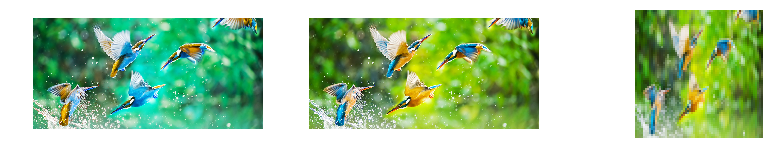

In [4]:
path = 'data/1.jpg'

img_bgr = cv2.imread(path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# resize image to speed up processing time
resized_img_rgb = cv2.resize(img_rgb, (64, 64), interpolation=cv2.INTER_AREA)

# plots
plt.figure(figsize=(14, 8))

plt.subplot(331)
plt.imshow(img_bgr)
plt.axis('off')

plt.subplot(332)
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(333)
plt.imshow(resized_img_rgb)
plt.axis('off')

plt.show()

One more thing before make our clusters:

In [5]:
# number of clusters
k = 10

# reshape the image to be a list of pixels
img_list = resized_img_rgb.reshape((resized_img_rgb.shape[0] * resized_img_rgb.shape[1], 3))

Now make the clusters:

In [6]:
# cluster the pixels and assign labels
clt = KMeans(n_clusters=k)
labels = clt.fit_predict(img_list)

In [7]:
# count labels to find most popular
label_counts = Counter(labels) # how many pixels each cluster has?
total_count = sum(label_counts.values())

# subset out most popular centroid
center_colors = list(clt.cluster_centers_)
ordered_colors = [center_colors[i]/255 for i in label_counts.keys()]
color_labels = [rgb2hex(ordered_colors[i]*255) for i in label_counts.keys()] # get each cluster's centroid color

print(label_counts.values())
print(color_labels)

dict_values([465, 610, 487, 575, 327, 450, 368, 364, 351, 99])
['#c8d3bb', '#33531a', '#5a7943', '#2782a4', '#b9ca14', '#b2ce67', '#8ea981', '#519112', '#83b33e', '#7abc09']


## Visualization

Finally join everything into a function and get some color plots:

In [8]:
def plot_image_info(path, k=6):
    # load image
    img_bgr = cv2.imread(path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # resize image to speed up processing time
    resized_img_rgb = cv2.resize(img_rgb, (64, 64), interpolation=cv2.INTER_AREA)

    # reshape the image to be a list of pixels
    img_list = resized_img_rgb.reshape((resized_img_rgb.shape[0] * resized_img_rgb.shape[1], 3))

    # cluster the pixels and assign labels
    clt = KMeans(n_clusters=k)
    labels = clt.fit_predict(img_list)
        
    # count labels to find most popular
    label_counts = Counter(labels)
    total_count = sum(label_counts.values())

    # subset out most popular centroid
    center_colors = list(clt.cluster_centers_)
    ordered_colors = [center_colors[i]/255 for i in label_counts.keys()]
    color_labels = [rgb2hex(ordered_colors[i]*255) for i in label_counts.keys()]
    
    #print(label_counts.values())
    #print(color_labels)
    
    # plots
    plt.figure(figsize=(14, 8))
    plt.subplot(221)
    plt.imshow(img_rgb)
    plt.axis('off')
    
    plt.subplot(222)
    plt.pie(label_counts.values(), labels=color_labels, colors=ordered_colors, startangle=90)
    plt.axis('equal')
    plt.show()

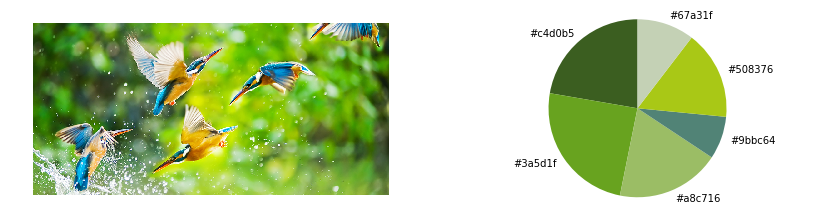

In [9]:
plot_image_info('data/1.jpg')

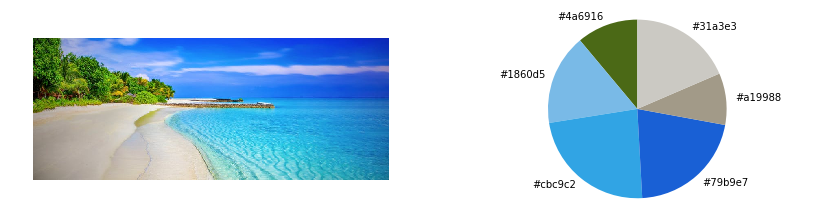

In [10]:
plot_image_info('data/2.jpg')

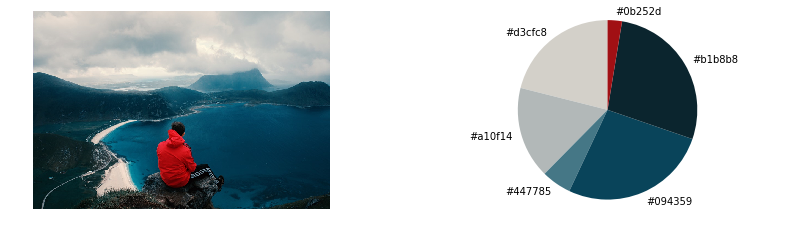

In [11]:
plot_image_info('data/3.jpg')

---
## Your assignment!

- Now try to generate some clusters using your own image.
- Modify the number of clusters.

In [8]:
# your code goes here...


<img src="https://camo.githubusercontent.com/53f6fb6ccefefd87dc93af20b8e7972573de9828/68747470733a2f2f757365722d696d616765732e67697468756275736572636f6e74656e742e636f6d2f373036353430312f33393131393531382d35396661353163652d343665632d313165382d383530332d3566383133363535386632622e706e67">

<a href="https://rmotr.com" target="_blank"><img src="https://camo.githubusercontent.com/cc5541fa8bc6f822cb8d5b4261a23f20ec8321f4/68747470733a2f2f757365722d696d616765732e67697468756275736572636f6e74656e742e636f6d2f373036353430312f33393131393438362d34373138653338362d343665632d313165382d396663332d3532353061343965663537302e706e67">
</a>